# Exploratory Data Analysis of London Undergound Data

In this notebook I will be conducting exploratory data analysis on London Underground exit data to summarise the key characteristics of the dataset and to evaluate any patterns and / or a relationship between Morning and Evening travel peak periods.

I will conduct this analysis in the following ways:
1. Calculate the Morning (AM) and Evening (PM) peak periods.
2. Evaluate key characteristics of the dataset using various visualisation methods.
3. Provide a simple classification of London Undergound Stations.


**Table of Contents**

1. Section 1: Calculating Morning and Evening Peaks
  * Section 1.1: Defining Peak Hours
  * Section 1.2: Calculate Morning and AM Peak
  * Section 1.3: Calculate Morning Peak Proportion
2. Section 2: Plotting and Analysing Distribution
  * Section 2.1: Producing Histogram
  * Section 2.2: Calculating Measures to Compare the AM and PM Peaks
  * Section 2.3: Boxplots
  * Section 2.4: Identifying Outliers
4. Section 4: Classification of Stations
  * Section 4.1: Define Classification
  * Section 4.2: Redefine Classification
  * Section 4.3: Test Classification using Sample of Stations
  * Section 4.4: Final Conclusions

### Importing the Various Libraries and the Dataset

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.api as sm 
%matplotlib inline

In [2]:
#Dataset
exits = pd.read_csv('hourlyExits.csv',index_col='Station')
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


## Section 1: Calculating Morning and Evening Peak Proportions

In this section we derive variables that can be used to compare the peak exits at different stations. 

### 1.1: Defining Peak Hours
The following 6 periods are commonly distinguished in the management of the London Underground. 

| Period      | Hours Included | 
|:----------- |:---------------- | 
|  Early      | H05, H06      | 
|  AMPeak     | H07, H08, H09 | 
|  Interpeak  | H10, H11, H12, H13, H14, H15 | 
|  PMPeak     | H16, H17, H18 | 
|  Evening    | H19, H20, H21 | 
|  Late       | H22, H23, H00, H01 | 

We will focus on only the morning and evening peaks. 

### 1.2 Create Dataframe to show AM and PM Peaks

Now that we have imported the dataset, I am going to create another new dataset that will consist of sub-groups within the main dataset - namely the hours that are considered within the Morning peak (7am - 9am) and Evening peak (4pm - 6pm).

The steps involved in doing this are:
- Create an empty dataframe
- Calculating AM and PM peaks counts for each station 
- Creating AM and PM peak counts column and add new columns to empty dataframe

In [3]:
#Create empty dataframe
df = pd.DataFrame()

#Combine H07, H08 and H09 to form AM column
AM_peaks = exits['H07'] + exits['H08'] + exits['H09']

#Combine H16, H17 and H18 to form PM column
PM_peaks = exits['H16'] + exits['H17'] + exits['H18']

#Add column to empty dataframe
df_1 = df.assign(Station = exits.index)

#Add column to empty dataframe
df_2 = df.assign(AMpeaks = AM_peaks)
df_2

,AMpeaks
Station,
Acton Town,1970
Aldgate,7408
Aldgate East,7618
Alperton,856
Amersham,424
...,...
Wimbledon Park,497
Wood Green,2165
Wood Lane,1798


In the below dataframe I can directly compare the Morning peak count to the Evening peak count for each station.

In [4]:
peak_counts = df_2.assign(PMpeaks = PM_peaks)
peak_counts

,AMpeaks,PMpeaks
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


### 1.3 Calculate Morning Peak Proportion

Now that I have created a new dataframe with the Morning peaks and Evening peaks, I can begin to start manipulating the data.

I will be doing the following to the dataset:
1. Create new dataframe
2. Calculate daily total for all stations by finding the sum of each row and add column to dataframe
3. Calculate proportion of AM peaks against total and add column to dataframe
4. Give new column the value of the proportion of AM peaks to the total and add column to dataframe
5. Calculate the difference between the AM and PM peak proportions and add column to dataframe
6. Calculate the ratio between the AM and PM peak proportions and add column to dataframe

In [5]:
totals = pd.DataFrame().assign(Total = exits.apply(sum, axis=1))
totals

#Calculate AM proportion and add new column to dataframe
AM_prop = totals.assign(AMproportion = peak_counts.AMpeaks / totals.Total)
AM_prop

#Repeat calculations for PM proportion
df_proportions = AM_prop.assign(PMproportion = peak_counts.PMpeaks / totals.Total)
df_proportions

,Total,AMproportion,PMproportion
Station,,,
Acton Town,9362,0.210425,0.280709
Aldgate,16136,0.459098,0.185424
Aldgate East,21206,0.359238,0.179336
Alperton,5118,0.167253,0.360883
Amersham,3905,0.108579,0.375160
...,...,...,...
Wimbledon Park,3296,0.150789,0.337985
Wood Green,18989,0.114013,0.341987
Wood Lane,6610,0.272012,0.267171


#### Calculating the difference between the AM and PM peak proportions

Next I will have a closer look at the AM and PM proportions in order to try and determine their relationship.
1. I will use the calculation `PM - AM` to find the difference between the AM and PM peak proportions
2. I will use `PM/AM` to calculate the ration between the AM and PM peak proportions

With the calculation I am using for the Difference, if the value is positive it means that the proportion of PM peaks is greater than AM peaks whereas if the number is negative the proportion of AM peaks is higher than PM peaks.

In [6]:
df_diff = df_proportions.assign(Difference = df_proportions.PMproportion - df_proportions.AMproportion)
df_diff

,Total,AMproportion,PMproportion,Difference
Station,,,,
Acton Town,9362,0.210425,0.280709,0.070284
Aldgate,16136,0.459098,0.185424,-0.273674
Aldgate East,21206,0.359238,0.179336,-0.179902
Alperton,5118,0.167253,0.360883,0.193630
Amersham,3905,0.108579,0.375160,0.266581
...,...,...,...,...
Wimbledon Park,3296,0.150789,0.337985,0.187197
Wood Green,18989,0.114013,0.341987,0.227974
Wood Lane,6610,0.272012,0.267171,-0.004841


#### Calculating the ratio
To calculate the ratio I will use `PM proportion / AM proportion`, therefore if the value of the ratio is higher than 1, then there are a higher proportion of PM peaks in comparison to AM peaks and therefore if the ratio is below 1 then the opposite is valid.

In addition to this, the ratio allows us to see how much higher one proportion is in comparison to the other (vice versa) which calculating the difference does not. Therefore we can see how much higher the PM peak is in comparison to the AM peak.

In [7]:
df_ratio = df_diff.assign(Ratio= df_proportions.PMproportion / df_proportions.AMproportion)
peak_proportions = df_ratio
peak_proportions

,Total,AMproportion,PMproportion,Difference,Ratio
Station,,,,,
Acton Town,9362,0.210425,0.280709,0.070284,1.334010
Aldgate,16136,0.459098,0.185424,-0.273674,0.403888
Aldgate East,21206,0.359238,0.179336,-0.179902,0.499212
Alperton,5118,0.167253,0.360883,0.193630,2.157710
Amersham,3905,0.108579,0.375160,0.266581,3.455189
...,...,...,...,...,...
Wimbledon Park,3296,0.150789,0.337985,0.187197,2.241449
Wood Green,18989,0.114013,0.341987,0.227974,2.999538
Wood Lane,6610,0.272012,0.267171,-0.004841,0.982202


## Section 2: Plotting and Analysing Distributions
In order to effectively plot histograms I need to find more information about this data - this is where a pivot table will help. A pivot table will allow me show only the data needed to produce a histogram that will help to visualise the distribution between the AM peaks and the PM peaks.

In the next section the steps I will be taking are:
1. Produce histograms of the AM and PM proportions and conduct analysis of their distributions.
2. Conduct further analysis of the data using alternative graphs/plots.

In [8]:
#Create pivot table
pivot = peak_proportions.pivot_table(values=('AMproportion','PMproportion'), index='Station', aggfunc='sum')
pivot

,AMproportion,PMproportion
Station,,
Acton Town,0.210425,0.280709
Aldgate,0.459098,0.185424
Aldgate East,0.359238,0.179336
Alperton,0.167253,0.360883
Amersham,0.108579,0.375160
...,...,...
Wimbledon Park,0.150789,0.337985
Wood Green,0.114013,0.341987
Wood Lane,0.272012,0.267171


### 2.1 Histograms
I will produce histograms in order to provide better insight into the distribution of the dataset and it will provide some indicators for outliers if there are any.

As you can see from the histograms below, the AM proportion has a heavy positive skew compared to the PM proportion which has a weak (negative) near-normal distribution. As a result, I believe that the AM proportion and PM proportion are slightly inversely proportional because as the AM proportion decreases, the PM proportion increases to a point. 

My conclusions can be confirmed by using the .describe() function which will provide details regarding the characteristics of the dataset including the mean and standard deviation.

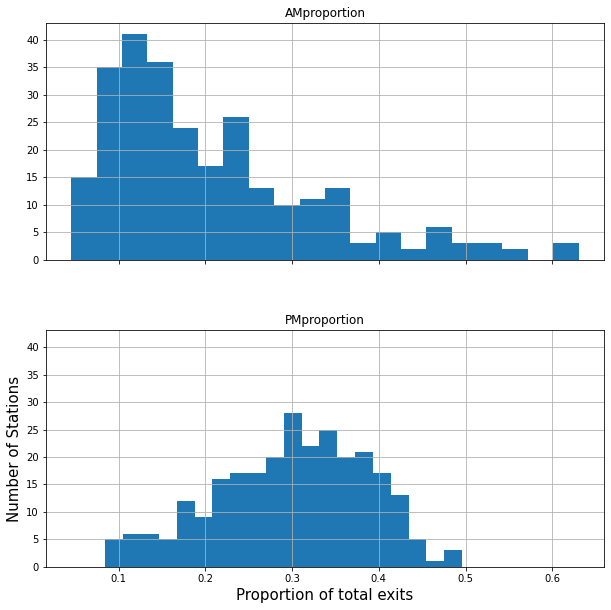

In [9]:
#Create histograms showing the distribution of both AM and PM peak proportions
pivot.hist(figsize=(10,10), bins=20, sharex = True, sharey = True, layout=(2,1))
plt.xlabel("Proportion of total exits", fontsize=15)
plt.ylabel("Number of Stations", fontsize=15)
plt.show()

### Analysis of Histograms

Key takeaways from histograms:
- Morning proportion has a positve skew as the median is higher than the mean, in addition the distribution has quite long tails which suggests that there are outliers which are affecting the mean of the distribution. 
- Morning proportion has a wider spread and higher standard deviation than Evening the proportion
- Lower proportion of exits are used in the Morning than Evening
- Evening proportion has a slightly negative but nearly normal distribution with a std of 0.08 and mean of 0.29 (median = 0.3).

These results are not entirely surprising as it is commonly known that many people commute into London and use the Underground for work in the morning and therefore utilise a higher number of exits at a smaller number of stations in the Morning (or use a low number of exits at a high number of stations). In comparison to the number of London Underground stations being used in the evening by commuters on their way home which is a lot more varied due to the various areas in London / Greater London that people live in to commute to London.

#### Data relating to the distribution of AM peak counts is shown below:

I have used the `.describe()` function in order to find the mean and compare this to the skews in the histograms. I have used this purely for verification purposes as it confirms what is already discernible from the histograms.

In [10]:
df_proportions.AMproportion.describe()

count    268.000000
mean       0.207132
std        0.122161
min        0.045302
25%        0.116120
50%        0.169378
75%        0.266443
max        0.630427
Name: AMproportion, dtype: float64

#### Data relating to the distribution of PM peak counts is shown below:

In [11]:
df_proportions.PMproportion.describe()

count    268.000000
mean       0.298750
std        0.087724
min        0.084630
25%        0.240947
50%        0.307397
75%        0.361596
max        0.496079
Name: PMproportion, dtype: float64

#### Data relating to the distribution of the difference between AM and PM peak proportions is shown below:

In [12]:
df_diff.Difference.describe()

count    268.000000
mean       0.091618
std        0.203932
min       -0.539649
25%       -0.014010
50%        0.139068
75%        0.242542
max        0.440373
Name: Difference, dtype: float64

#### Data relating to the distribution of the ratio of PM peak counts to AM peak counts is shown below:

In [13]:
peak_proportions.Ratio.describe()

count    268.000000
mean       2.235571
std        1.738205
min        0.136518
25%        0.951802
50%        1.799470
75%        3.053160
max        9.205224
Name: Ratio, dtype: float64

### 2.2 Further analysis using alternative techniques

The histograms have provided some insight into the distributon of the London Undergoround exit data. I can use quartile to quartile (QQ) plots to validate my conclusions about the skew and overall distribution of the data. 

Using QQ plots it is clear that my evaluations were correct as it is clear that there is a positive skew for the AM proportions as the tails are to the left of the 45 degree line. Moreover, the plots confirm that the PM peaks are nearly normally distributed as the line sits along the 45 degree line almost entirely with an exception at both tails.

### 2.2.1 QQ plots

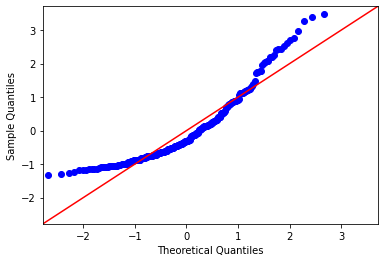

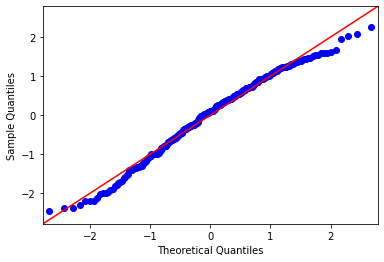

In [14]:
#Produce QQ plot for AM and PM proportions
fig1 = sm.qqplot(df_proportions.AMproportion, fit=True, line="45")
fig2 = sm.qqplot(df_proportions.PMproportion, fit=True, line='45')
plt.show()

### 2.3 Boxplots 
The `describe()` function used in the previous analysis section, shows important characteristics about the data such as the mean and the minimum and maximum values. However, it did not present this information in a clear manner that makes it easy to compare the qualities of AM proportion and the PM proportion. In order to do so, I am going to use boxplots.

As you can see from the boxplots below there is undeniably an overlap between the AM and PM datasets, however there are some obvious observations which could only be inferred from the histograms.
1. Thse boxplots confirm that the tails at the end of the AM proportions histogram are a number of clearly visible outliers which have skewed the distribution.
2. The range of the data is slightly higher for AM proportions but is almost the same between the two therefore the minimum and maximum proportion for AM and PM is nearly the same.
3. The median is considerably lower for AM proportions, as the median PM proportion is higher than the Q3 (third quartile) of AM proportions.
4. Q1 (first quartile) for PM proportions is slightly below Q3 (third quartile) of AM proportions and therefore the IQR (interquartile range) between the two datasets nearly does not overlap.

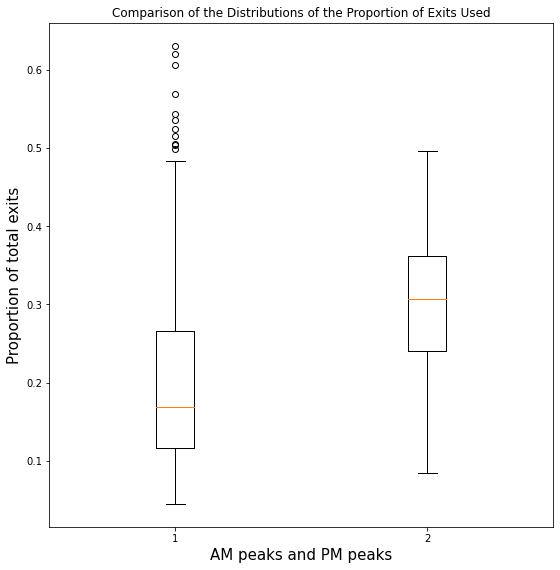

In [15]:
#Combine datasets so that they can be shown on one graph
data = [df_proportions.AMproportion, df_proportions.PMproportion]

fig = plt.figure(figsize =(7, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_axisbelow(True)
ax.set_title('Comparison of the Distributions of the Proportion of Exits Used')
ax.set_xlabel('AM peaks and PM peaks', fontsize=15)
ax.set_ylabel('Proportion of total exits', fontsize=15)
  
# Creating plot 
bp = ax.boxplot(data) 
plt.show() 

### Analysis of Boxplots
The main takeaway from these boxplots, which is similar to that of those with the histograms, is that there are clearly a high number of stations that have a low number of exits used in the Morning (as a proportion of the total number of exits used at that station) which in turn brings the mean and the IQR down significantly but there are also a few outlier stations that have a much higher number of exits used which increase the overall range of values.

On the contrary, in the evening most stations have a similar number of exits utilise with no major outliers or deviations. This is because people travel to a greater number of stations in the evening as people commute from all over London, using a more consistent number of exits across the board so the mean is higher than in the Morning.

### 2.4 Identifying Outliers
As mentioned in section 2.2 insight 1) there are clearly some outliers within the AM proportion dataset (demonstrating by the left boxplot). To identify these outliers within the dataset I must first calculate the interquartile range as Q1 and Q3 were provided in the previous section using the `describe()` function. Then using these values to produce the upper and lower bounds for the dataset which will inform which values are categorised as outliers.

In [16]:
#Provides details on distribution of dataset
df_proportions.AMproportion.describe()

# Define quartiles and calculate interquartile range
Q1 = df_proportions.AMproportion.quantile(0.25)
Q3 = df_proportions.AMproportion.quantile(0.75)

IQR = Q3 - Q1
IQR

#Find upper bound and lower bound of AM proportion dataset
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR)

#lower_bound
#upper_bound

### Removing Outliers 
Below you can see that there are 11 stations that are considered outliers based on their AM proportions, however I will not be removing these outliers. Sometimes outliers can provide additional insights into the dataset and therefore it is not always best place to remove them but instead they could be corrected or better explain underlying issues with the dataset.

I will posit that if I had removed the outliers I would expect to see the mean and median would decrease as the extreme values above the upper bound would be removed.

In [17]:
#Find how many stations are considered outliers
AM_prop_outlier = df_proportions.AMproportion[((df_proportions.AMproportion < (lower_bound)) |(df_proportions.AMproportion > (upper_bound)))]
AM_prop_outlier.shape

(11,)

## Section 3: A Simple Classification of Stations

In this section I will classify the stations within the dataset into these three categories:

1. Work: have (significantly) ‘more’ exits in the AM peak than in the PM peak
2. Residential: have (significantly) ‘more’ exits in the PM peak than in the AM peak
3. Other: the number exits in the AM and PM peaks are approximately equal

There are several ways to determine the classification, I have chosen to use the AMproportion and PMproportion columns rather than the Difference column. Below you will see that by using '>' (more than) '<' and (less than), I have grouped the stations into the aforementioned categories.

In this section I will:
1. Define the classification and do relevant analysis
2. Review Classification
3. Test Classification

### 3.1 Define Classification

In [18]:
#Create classes
def stationCategory(row):
    if (row.AMproportion > row.PMproportion) : return 'Work'
    if (row.AMproportion < row.PMproportion) : return 'Residential'
    return 'Other'

peak_proportions.apply(stationCategory, axis=1)

new_df = peak_proportions.assign(Category = peak_proportions.apply(stationCategory, axis=1))
new_df

,Total,AMproportion,PMproportion,Difference,Ratio,Category
Station,,,,,,
Acton Town,9362,0.210425,0.280709,0.070284,1.334010,Residential
Aldgate,16136,0.459098,0.185424,-0.273674,0.403888,Work
Aldgate East,21206,0.359238,0.179336,-0.179902,0.499212,Work
Alperton,5118,0.167253,0.360883,0.193630,2.157710,Residential
Amersham,3905,0.108579,0.375160,0.266581,3.455189,Residential
...,...,...,...,...,...,...
Wimbledon Park,3296,0.150789,0.337985,0.187197,2.241449,Residential
Wood Green,18989,0.114013,0.341987,0.227974,2.999538,Residential
Wood Lane,6610,0.272012,0.267171,-0.004841,0.982202,Work


#### Analysis of Station Classification

By using the AMproportions and PMproportions columns, I have not received the most accurate classification possible. Below you can see that by using this method there are only two stations that have exactly the same number of AM and PM peak values. However, if you look above at Wood Lane station, the difference between AM and PM peaks is -0.004 which to 2 decimal places is -0.00 and therefore nearly equal and thus should be included in the Other category.

I could simply set the precision for the dataset to 3 decimal places and hope this fixes the issue but instead in order to obtain as many approximately equal AM peak and PM peak stations in the Other category, I will redefine the categories in the next sub-section.

In [19]:
new_df.loc[new_df.Category == 'Other']

,Total,AMproportion,PMproportion,Difference,Ratio,Category
Station,,,,,,
Hampstead,7286,0.233599,0.233599,0.0,1.0,Other
Moor Park,1584,0.301136,0.301136,0.0,1.0,Other


Below are the number of stations in each category. I will compare this value to the values obtained after redefining the classification for those categories

In [20]:
#Number of stations classified as Work
work = len(new_df.loc[new_df.Category == 'Work'])
residential = len(new_df.loc[new_df.Category == 'Residential'])
other = len(new_df.loc[new_df.Category == 'Other'])
print('The number of stations classed as Work is: ',work )
print('The number of stations classed as Residential is: ', residential)
print('The number of stations classed as Other is: ', other)

The number of stations classed as Work is:  72
The number of stations classed as Residential is:  194
The number of stations classed as Other is:  2


### 3.2 Redefining Classification

As mentioned, I will reclassify the stations using the Difference column I calculated in section 1. For the calculation of the Difference column I used `PM peak proportion - AM peak proportion`, therefore a positive difference means that the PM value is larger than the AM value. I have chosen to use 10% or 0.1 as determinant for `approximately equal` as I believe this is appropriate value, looking at the distribution of the dataset.

It is also worth noting that rather than use the difference, I could also use the ratio that I calculated in section 1 also and determine the "significant difference" as something arbitray like a ratio of more than 1.5 or less than 0.5. However, in this case I have chosen to stick with the difference.

In [21]:
#Reclassifying station categories using Difference column
def stationCategory2(row):
    if (row.Difference > 0.1) : return 'Residential'
    if (row.Difference < -0.1) : return 'Work'
    return 'Other'

peak_proportions.apply(stationCategory2, axis=1)

redefine_df = peak_proportions.assign(Category = peak_proportions.apply(stationCategory2, axis=1))

#### 3.2.1 Updated Analysis

As you can see the classification of stations is a lot more distributed as a result of using the difference column as the classifier. The number of stations classified as 'Work' and 'Residential' have both decreased whereas the number of 'Other' stations has increased substantially.

This classification is still very simple and therefore will not necessarily produce completely accurate results which is why I must test the accuracy. In the next section I will use some Northern Line Underground stations to do this.

In [22]:
work_update = len(redefine_df.loc[redefine_df.Category == 'Work'])
residential_update = len(redefine_df.loc[redefine_df.Category == 'Residential'])
other_update = len(redefine_df.loc[redefine_df.Category == 'Other'])

print('The updated number of stations classed as Work is: ',work_update )
print('The updated number of stations classed as Residential is: ', residential_update)
print('The updated number of stations classed as Other is: ', other_update)

The updated number of stations classed as Work is:  48
The updated number of stations classed as Residential is:  147
The updated number of stations classed as Other is:  73


### 3.3 Test Classification Using Sample of Stations

In order to test the accuracy of my classifications let's find the classification of the following Northern Line Underground Stations...

Archway, Balham, Embankment, Goodge Street, Highgate, High Barnet, Leicester Square,
Morden, South Wimbledon, Tottenham Court Road and Warren Street.

In [23]:
pivot_df = redefine_df.pivot_table(values= 'Category', index='Station', aggfunc='sum' )
pivot_df

,Category
Station,
Acton Town,Other
Aldgate,Work
Aldgate East,Work
Alperton,Residential
Amersham,Residential
...,...
Wimbledon Park,Residential
Wood Green,Residential
Wood Lane,Other


### The following have all been classified as Work:

This is unsurprising as all these stations are all within Fare Zone 1 and therefore in Central London which is the area of London that is traditionally associated with work and / or business.

In [24]:
pivot_df.loc['Goodge Street']

Category    Work
Name: Goodge Street, dtype: object

In [25]:
pivot_df.loc['Tottenham Court Road']

Category    Work
Name: Tottenham Court Road, dtype: object

In [26]:
pivot_df.loc['Warren Street']

Category    Work
Name: Warren Street, dtype: object

### The following have all been classified as Residential:

These stations are distributed across more London fare zones than above. However, all these stations are in Zone 3 or higher and therefore further away from Central London. This is also aligned with them being classed as residential as the residential areas within London typically span across all fare zones but least of all Zones 1 and 2. 

In [27]:
pivot_df.loc['Archway']    

Category    Residential
Name: Archway, dtype: object

In [28]:
pivot_df.loc['Balham']

Category    Residential
Name: Balham, dtype: object

In [29]:
pivot_df.loc['Highgate']

Category    Residential
Name: Highgate, dtype: object

In [30]:
pivot_df.loc['High Barnet'] 

Category    Residential
Name: High Barnet, dtype: object

In [31]:
pivot_df.loc['Morden']

Category    Residential
Name: Morden, dtype: object

In [32]:
pivot_df.loc['South Wimbledon']

Category    Residential
Name: South Wimbledon, dtype: object

### The following have been classified within the Other category:

These two are also less surprising as they are associated neither with Work or Residential life. These two areas are associated more with leisure and free time and thus have a more consisted flow of traffic throughout the entire day and therefore the 'Other' category seems highly appropriate. 

In [33]:
pivot_df.loc['Leicester Square']

Category    Other
Name: Leicester Square, dtype: object

In [34]:
pivot_df.loc['Embankment']

Category    Other
Name: Embankment, dtype: object

### 3.4 Conclusion
Despite how simple this classification is, it has been surprisingly accurate. There are a lot of variables that will contribute to stations being categorised within `Work`, `Residential` or `Other` areas but this suggests that `Morning` and `Evening` peak proportions is an important variable. There are undoubtedly stations that have been misclassified or need further analysis however I would say that this classification has passed the Northern Line test.